In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    train_df_original = pd.read_csv('/content/Consumer_Complaints_train.csv')
    test_df_original = pd.read_csv('/content/Consumer_Complaints_test.csv')
    train_df = train_df_original.copy()
    test_df = test_df_original.copy()
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: Data files not found.")
    exit()

Data loaded successfully.


In [3]:
print("Train Data Types:\n", train_df.dtypes)
print("Test Data Types:\n", test_df.dtypes)

Train Data Types:
 Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object
Test Data Types:
 Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company publi

In [4]:
for df_name, df in [('Train', train_df), ('Test', test_df)]:
    missing_percentage = df.isnull().sum() * 100 / len(df)
    cols_to_drop = missing_percentage[missing_percentage > 25].index
    df.drop(columns=cols_to_drop, inplace=True)
    print(f"{df_name} columns dropped (>25% missing): {list(cols_to_drop)}")

Train columns dropped (>25% missing): ['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?']
Test columns dropped (>25% missing): ['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?']


In [5]:
for df in [train_df, test_df]:
    df['Date received'] = pd.to_datetime(df['Date received'])
    df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])
    df['Day_Received'] = df['Date received'].dt.day
    df['Month_Received'] = df['Date received'].dt.month
    df['Year_Received'] = df['Date received'].dt.year
    df['Week_Received'] = df['Date received'].dt.isocalendar().week
    df['Days_held'] = (df['Date sent to company'] - df['Date received']).dt.days

In [6]:
test_submission_ids = test_df_original['Complaint ID'].copy()
for df in [train_df, test_df]:
    df.drop(columns=["Date received", "Date sent to company", "ZIP code", "Complaint ID"], inplace=True, errors='ignore')

In [7]:
for df in [train_df, test_df]:
    if 'State' in df.columns:
        df['State'].fillna(df['State'].mode()[0], inplace=True)

/tmp/ipython-input-646827278.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['State'].fillna(df['State'].mode()[0], inplace=True)


In [8]:
disputed_cons = train_df[train_df['Consumer disputed?'] == 'Yes'].copy()

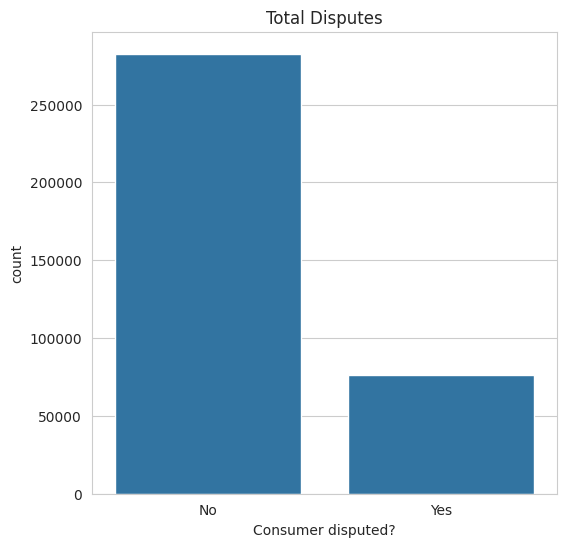

In [10]:
sns.set_style("whitegrid")

plt.figure(figsize=(6, 6))
sns.countplot(x='Consumer disputed?', data=train_df)
plt.title('Total Disputes')
plt.show()

/tmp/ipython-input-3150138953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Product', data=disputed_cons, order=disputed_cons['Product'].value_counts().index, palette='plasma')


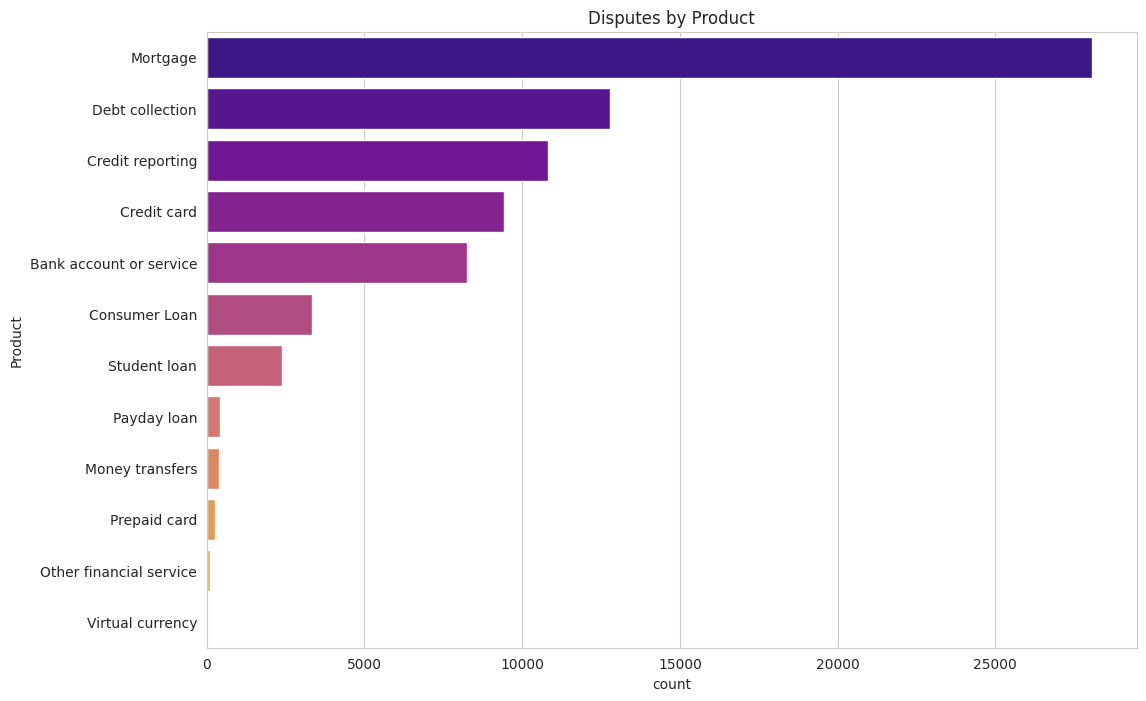

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Product', data=disputed_cons, order=disputed_cons['Product'].value_counts().index, palette='plasma')
plt.title('Disputes by Product')
plt.show()


/tmp/ipython-input-2423752533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Issue', data=disputed_cons, order=disputed_cons['Issue'].value_counts().index[:10], palette='viridis')


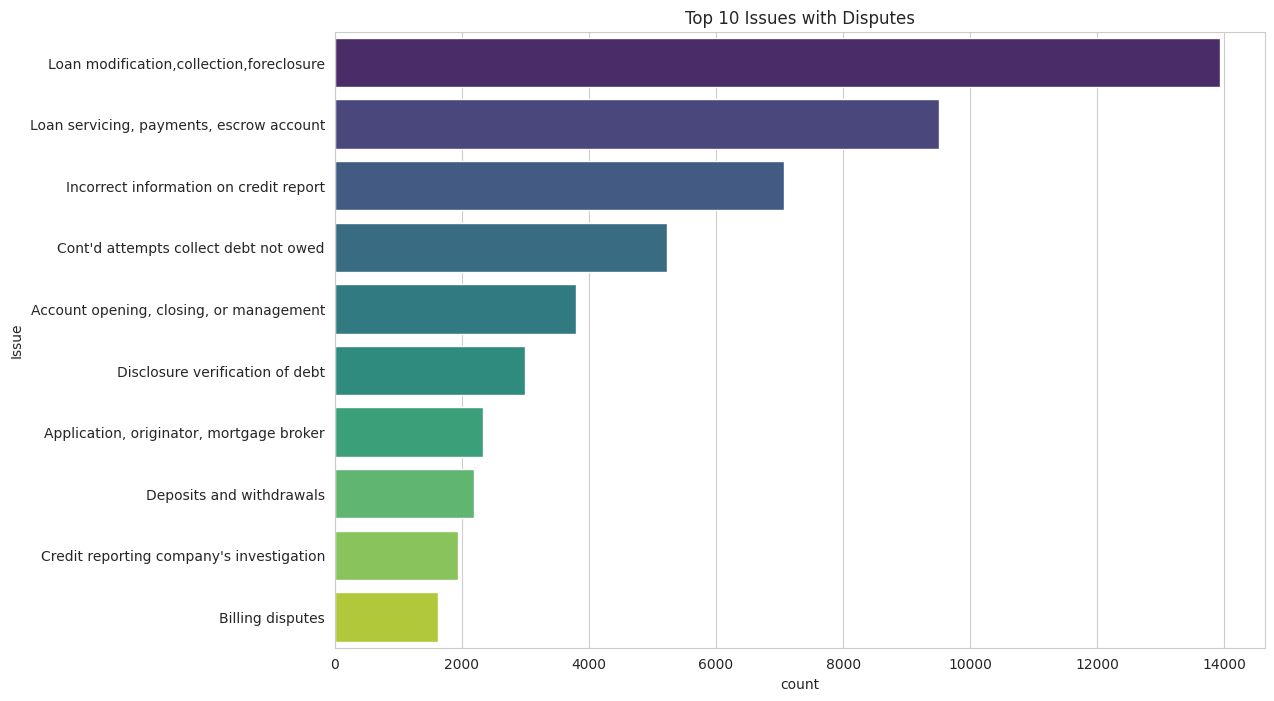

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Issue', data=disputed_cons, order=disputed_cons['Issue'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Issues with Disputes')
plt.show()


/tmp/ipython-input-1698113365.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='State', data=disputed_cons, order=disputed_cons['State'].value_counts().index[:15], palette='magma')


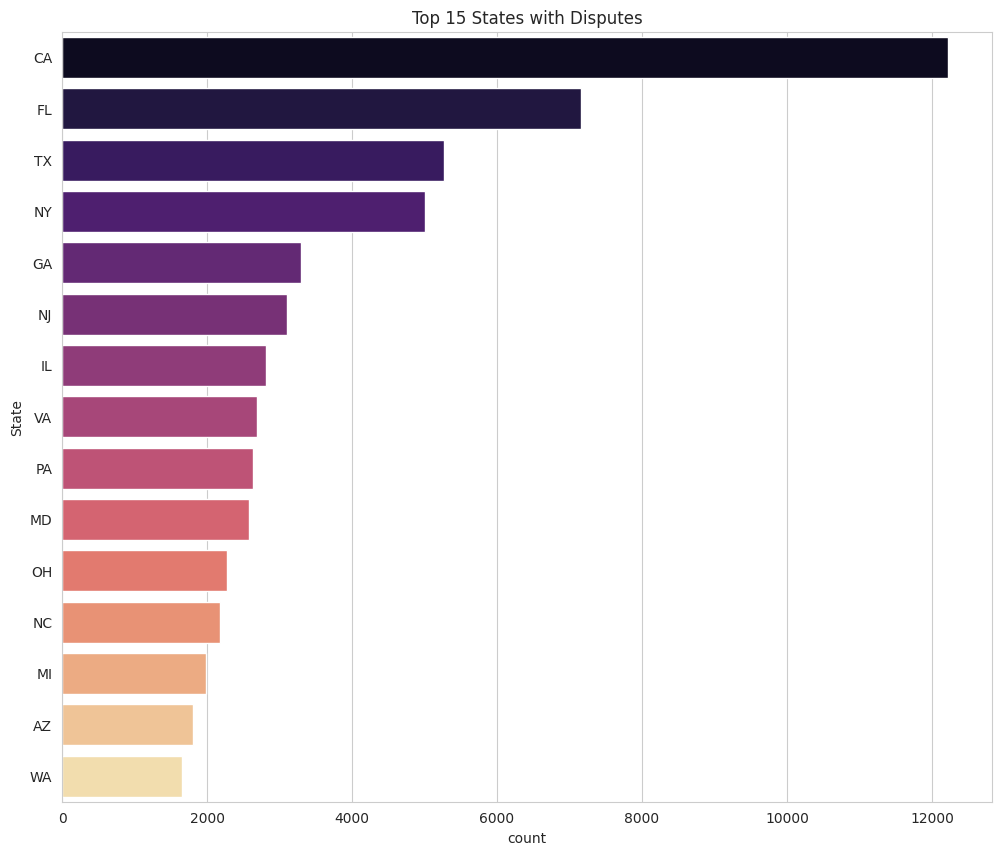

In [13]:
plt.figure(figsize=(12, 10))
sns.countplot(y='State', data=disputed_cons, order=disputed_cons['State'].value_counts().index[:15], palette='magma')
plt.title('Top 15 States with Disputes')
plt.show()

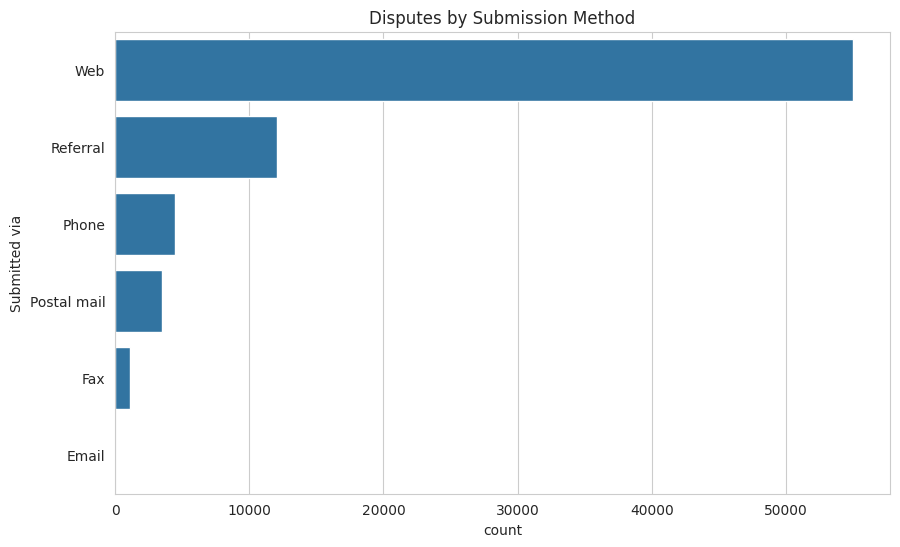

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Submitted via', data=disputed_cons, order=disputed_cons['Submitted via'].value_counts().index)
plt.title('Disputes by Submission Method')
plt.show()

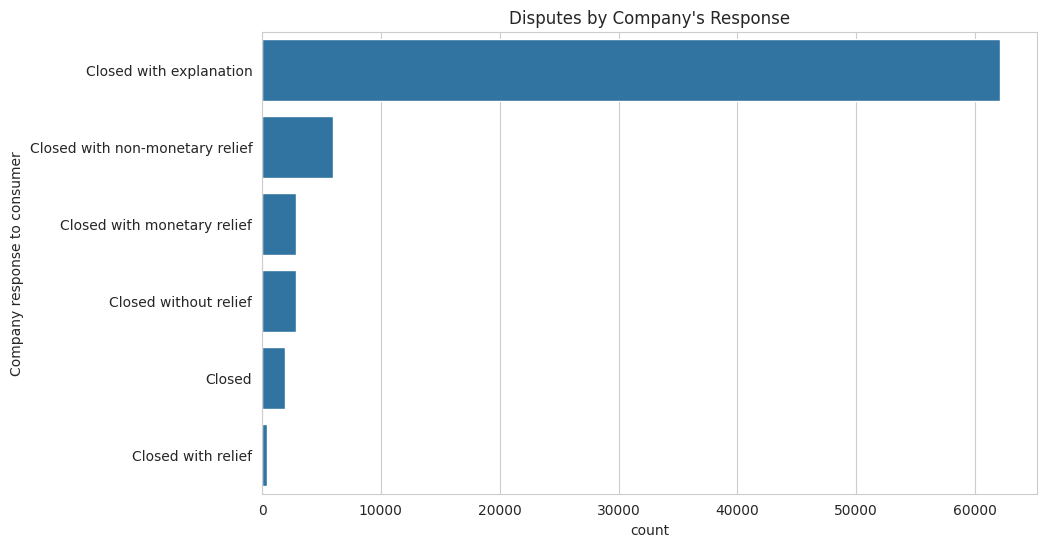

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Company response to consumer', data=disputed_cons, order=disputed_cons['Company response to consumer'].value_counts().index)
plt.title("Disputes by Company's Response")
plt.show()

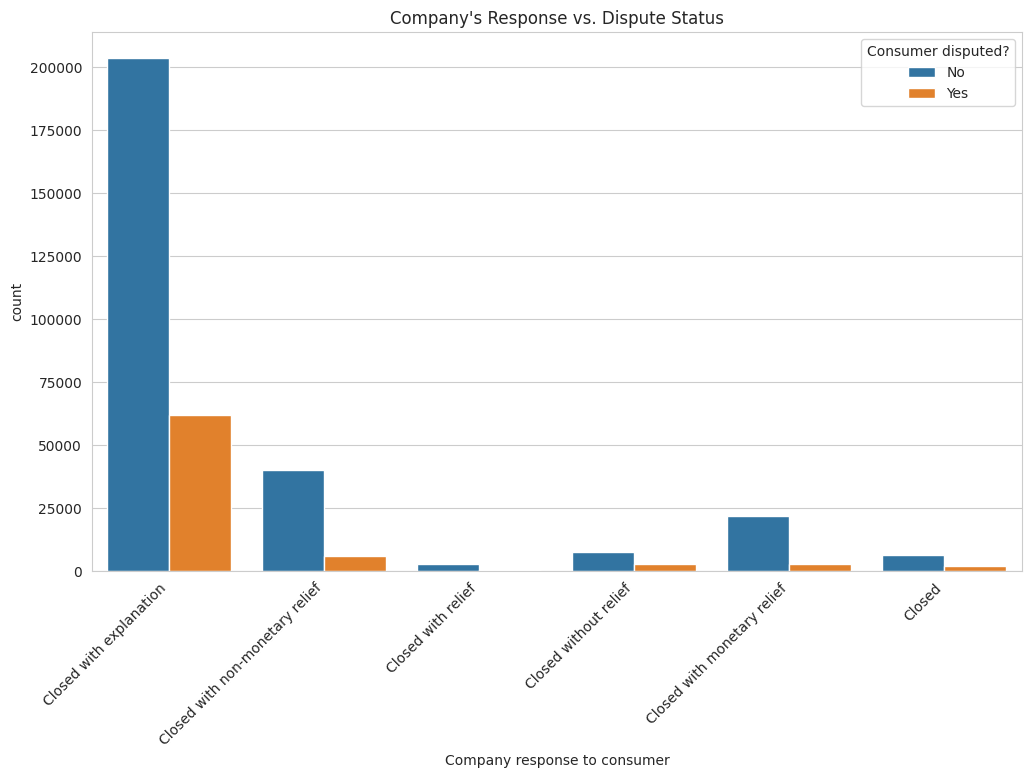

In [16]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Company response to consumer', hue='Consumer disputed?', data=train_df)
plt.xticks(rotation=45, ha='right')
plt.title("Company's Response vs. Dispute Status")
plt.show()

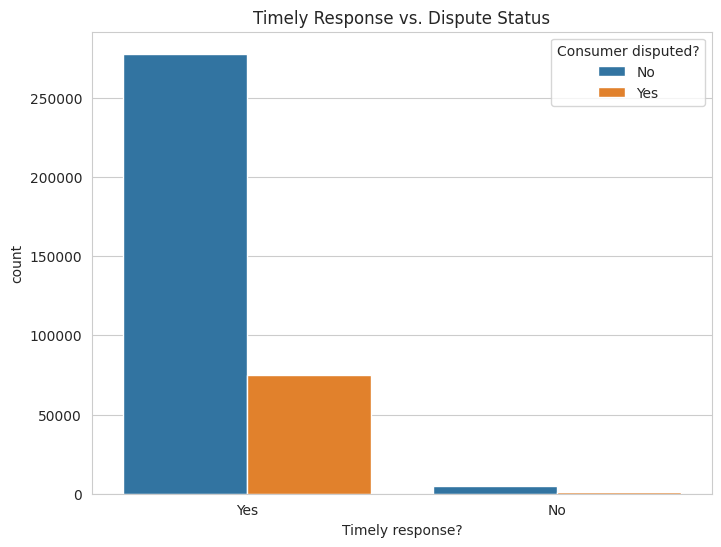

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Timely response?', hue='Consumer disputed?', data=train_df)
plt.title('Timely Response vs. Dispute Status')
plt.show()

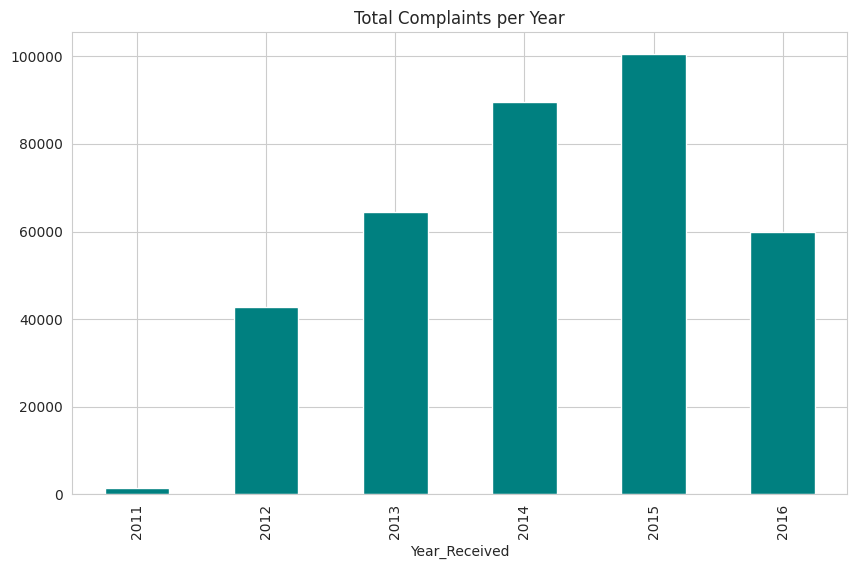

In [18]:
plt.figure(figsize=(10, 6))
train_df['Year_Received'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Total Complaints per Year')
plt.show()

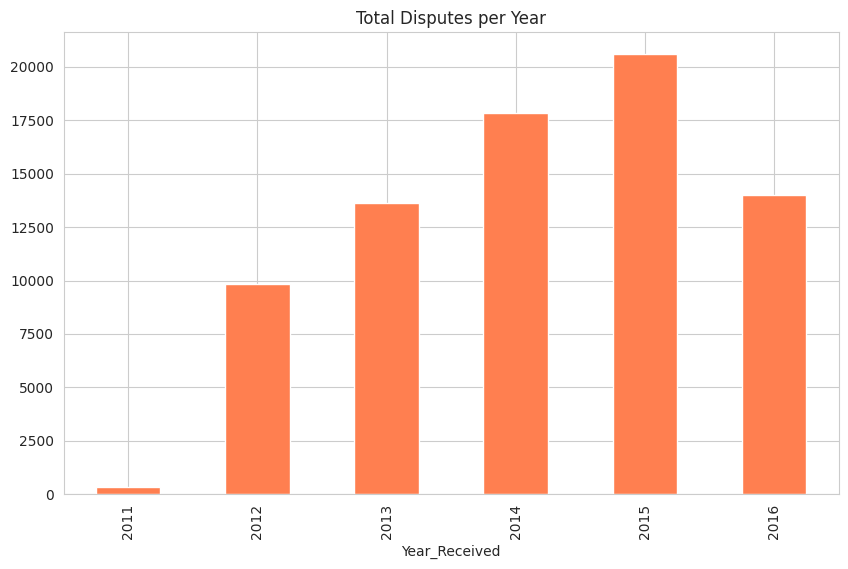

In [19]:
plt.figure(figsize=(10, 6))
disputed_cons['Year_Received'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.title('Total Disputes per Year')
plt.show()

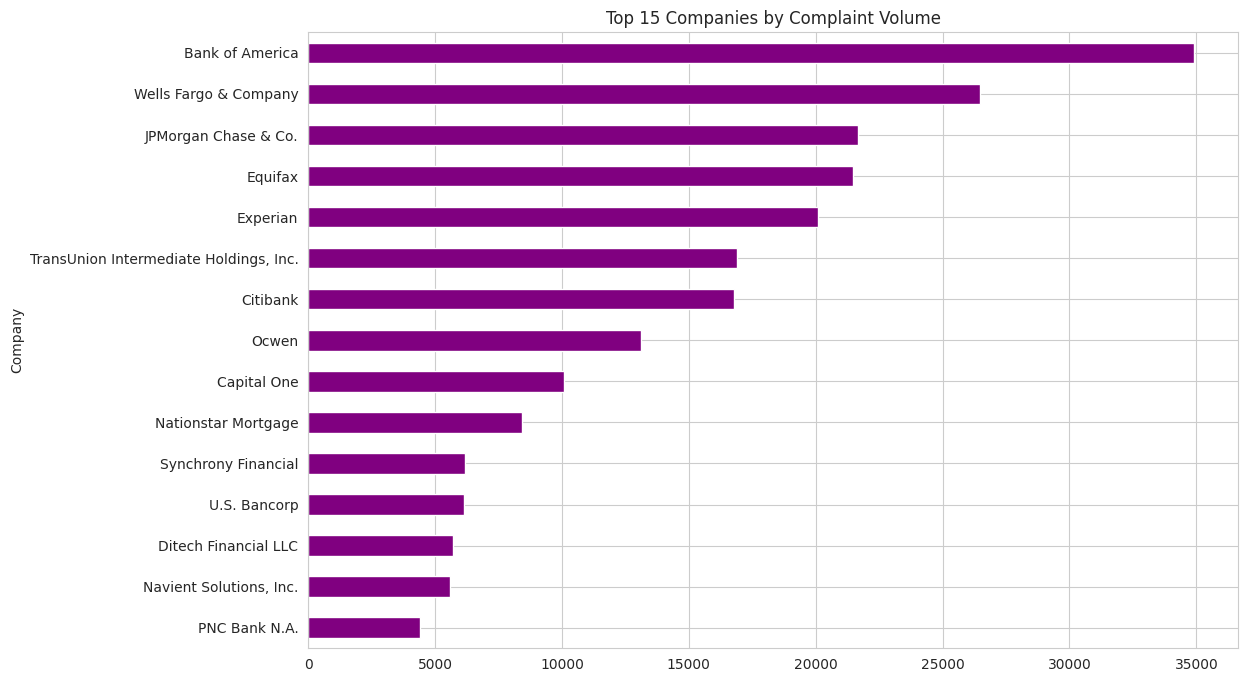

In [20]:
plt.figure(figsize=(12, 8))
train_df_original['Company'].value_counts()[:15].plot(kind='barh', color='purple')
plt.title('Top 15 Companies by Complaint Volume')
plt.gca().invert_yaxis()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [22]:
for df in [train_df, test_df]:
    df['Days_held'] = np.where(df['Days_held'] < 0, 0, df['Days_held'])

In [23]:
cols_to_drop = ['Company', 'State', 'Year_Received', 'Days_held']
train_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
test_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [24]:
train_df['Consumer disputed?'] = train_df['Consumer disputed?'].map({'Yes': 1, 'No': 0})
train_df['Consumer disputed?'].fillna(train_df['Consumer disputed?'].mode()[0], inplace=True)

/tmp/ipython-input-4242126898.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Consumer disputed?'].fillna(train_df['Consumer disputed?'].mode()[0], inplace=True)


In [25]:
categorical_cols = train_df.select_dtypes(include=['object']).columns
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

In [26]:
train_labels = train_df['Consumer disputed?']
train_features = train_df.drop('Consumer disputed?', axis=1)
train_features, test_features = train_features.align(test_df, join='inner', axis=1)

In [27]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_features)
test_scaled = scaler.transform(test_features)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train_scaled, train_labels, test_size=0.2, random_state=42, stratify=train_labels)

In [29]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [30]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))


Logistic Regression Accuracy: 0.5688
              precision    recall  f1-score   support

          No       0.83      0.56      0.67     56528
         Yes       0.27      0.59      0.37     15234

    accuracy                           0.57     71762
   macro avg       0.55      0.58      0.52     71762
weighted avg       0.71      0.57      0.61     71762


Decision Tree Accuracy: 0.6569
              precision    recall  f1-score   support

          No       0.81      0.74      0.77     56528
         Yes       0.26      0.33      0.29     15234

    accuracy                           0.66     71762
   macro avg       0.53      0.54      0.53     71762
weighted avg       0.69      0.66      0.67     71762


Random Forest Accuracy: 0.6473
              precision    recall  f1-score   support

          No       0.81      0.72      0.76     56528
         Yes       0.26      0.36      0.30     15234

    accuracy                           0.65     71762
   macro avg       0.53   

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:13:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBClassifier Accuracy: 0.6368
              precision    recall  f1-score   support

          No       0.82      0.69      0.75     56528
         Yes       0.27      0.43      0.34     15234

    accuracy                           0.64     71762
   macro avg       0.55      0.56      0.54     71762
weighted avg       0.70      0.64      0.66     71762



In [31]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} (Accuracy: {results[best_model_name]:.4f})")


Best Model: KNeighbors (Accuracy: 0.6877)


In [32]:
predictions = best_model.predict(test_scaled)
submission_df = pd.DataFrame({'Complaint ID': test_submission_ids, 'Consumer disputed?': predictions})
submission_df['Consumer disputed?'] = submission_df['Consumer disputed?'].map({1: 'Yes', 0: 'No'})
submission_df.to_csv('submission.csv', index=False)
print("\nSubmission file 'submission.csv' created.")



Submission file 'submission.csv' created.
   Complaint ID Consumer disputed?
0       1198133                 No
1       1979989                Yes
2       1552090                 No
3       1929306                Yes
4       2001667                Yes


In [33]:
print(submission_df.head(15))

    Complaint ID Consumer disputed?
0        1198133                 No
1        1979989                Yes
2        1552090                 No
3        1929306                Yes
4        2001667                Yes
5          11475                Yes
6        1708256                 No
7         445895                 No
8         940573                 No
9         959328                Yes
10       1403396                Yes
11        181983                 No
12        728910                 No
13         95969                 No
14        712177                 No
